In [1]:
import pandas as pd
import numpy as np

# * A walkthrough data analyzing and cleaning with Pandas.
# * This is Airbnb New Users Booking data a part of Kaglle comptetions data it's avilable on kaggle website.
# * I will do another part follow, that will cover visualzation with seaborn and machine learning model in the future. 


In [2]:
# Get work directory in the system
import os
os.getcwd()

'C:\\Users\\A\\Desktop\\D.S\\airbnb'

In [3]:
# read raw data into pandas
air = pd.read_csv('train_users_2.csv')

In [4]:
air.shape

(213451, 16)

In [5]:
# a quick look into first 10 rows
air.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [6]:
air.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

# As the shape of data shown above that 16 columns of more than tow hundred thousands of data available.And at the first glance of data can tell there are a lot of missing data. 
let's review the data :
\> In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics.

\> All the users in this dataset are from the USA.

\> There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. 

\> Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.


\> The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.) 


# Also before conuntinue any further there is some qoustion in mind:
1. What type of formate for date, numerical values, are provided 
2. How about the missing values ?
3. How do the diffrerent features relate to each other ?

In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 15.5+ MB


In [8]:
type(air)

pandas.core.frame.DataFrame

In [9]:
air.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [10]:
# Check up the missing values
air.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [11]:
# All focusing will be on the train data set therefore let's dive in..
air.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


# Looking at the data above it provide us with key information :
 1. What type of formate for date, numerical values, are provided 
 2. How about the missing values ?
 3. How do the diffrerent features relate to each other ?

In [12]:
air.country_destination.describe()

count     213451
unique        12
top          NDF
freq      124543
Name: country_destination, dtype: object

In [13]:
# There are 12 possible outcomes of the destination country. 
sorted(air.country_destination.unique())


['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US', 'other']

In [14]:
air[air.country_destination.isin(['NDF'])]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF
16,2dwbwkx056,2010-01-07,20100107215125,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF
18,cxlg85pg1r,2010-01-08,20100108015641,NaN,-unknown-,NaN,basic,0,en,seo,facebook,NaN,Web,Other/Unknown,-unknown-,NDF
23,jha93x042q,2010-01-11,20100111224015,NaN,-unknown-,NaN,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
24,7i49vnuav6,2010-01-11,20100111230808,NaN,FEMALE,40.0,basic,0,en,seo,google,untracked,Web,Mac Desktop,Firefox,NDF
26,bjg0m5otl3,2010-01-12,20100112155420,NaN,-unknown-,NaN,basic,0,en,other,other,untracked,Web,Other/Unknown,-unknown-,NDF


In [15]:
# The chart belew users by destination. 
a = air.country_destination.value_counts()
b = air.country_destination.value_counts(normalize=True)

In [16]:
# users by destination in both numbers and percentage.
pd.concat([a, b], axis=1)

,country_destination,country_destination
NDF,124543,0.583473
US,62376,0.292226
other,10094,0.047290
FR,5023,0.023532
IT,2835,0.013282
GB,2324,0.010888
ES,2249,0.010536
CA,1428,0.006690
DE,1061,0.004971
NL,762,0.003570


# The most important colmun among the dataset is the Country Destination column thus is the one model will try to predict, by looking at the codes above the number of records of each destination can help provide some insight and how our model going to be constructed.


In [17]:
air['date_account_created'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2010-06-28
1         2011-05-25
2         2010-09-28
3         2011-12-05
4         2010-09-14
5         2010-01-01
6         2010-01-02
7         2010-01-03
8         2010-01-04
9         2010-01-04
10        2010-01-04
11        2010-01-05
12        2010-01-05
13        2010-01-05
14        2010-01-07
15        2010-01-07
16        2010-01-07
17        2010-01-07
18        2010-01-08
19        2010-01-10
20        2010-01-10
21        2010-01-10
22        2010-01-11
23        2010-01-11
24        2010-01-11
25        2010-01-12
26        2010-01-12
27        2010-01-12
28        2010-01-13
29        2010-01-13
             ...    
213421    2014-06-30
213422    2014-06-30
213423    2014-06-30
213424    2014-06-30
213425    2014-06-30
213426    2014-06-30
213427    2014-06-30
213428    2014-06-30
213429    2014-06-30
213430    2014-06-30
213431    2014-06-30
213432    2014-06-30
213433    2014-06-30
213434    2014-06-30
213435    2

In [18]:

pd.crosstab(air.date_account_created, air.country_destination)

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
date_account_created,,,,,,,,,,,,
2010-01-01,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-02,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-03,0,0,0,0,0,0,0,0,0,0,1,0
2010-01-04,0,0,0,0,0,0,0,0,0,0,3,0
2010-01-05,0,0,0,0,1,0,0,2,0,0,0,0
2010-01-07,0,1,0,0,0,0,0,2,0,0,1,0
2010-01-08,0,0,0,0,0,0,0,1,0,0,0,0
2010-01-10,0,0,0,0,1,0,0,0,0,0,2,0
2010-01-11,0,0,0,0,0,0,0,2,0,0,1,0


In [19]:
pd.crosstab(air.country_destination, air.date_account_created)

date_account_created,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-07,2010-01-08,2010-01-10,2010-01-11,2010-01-12,...,2014-06-21,2014-06-22,2014-06-23,2014-06-24,2014-06-25,2014-06-26,2014-06-27,2014-06-28,2014-06-29,2014-06-30
country_destination,,,,,,,,,,,,,,,,,,,,,
AU,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,2,0,0,0,3
CA,0,0,0,0,0,1,0,0,0,0,...,3,3,4,10,2,4,5,3,4,3
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,4,1,0,4,1,1,1,5
ES,0,0,0,0,0,0,0,0,0,0,...,4,6,4,11,5,5,3,3,2,7
FR,0,0,0,0,1,0,0,1,0,1,...,6,6,10,13,11,6,12,12,8,13
GB,0,0,0,0,0,0,0,0,0,0,...,2,6,5,5,5,4,4,8,4,6
IT,0,0,0,0,0,0,0,0,0,0,...,2,4,6,9,10,7,6,7,7,12
NDF,0,0,0,0,2,2,1,0,2,1,...,292,343,364,420,395,393,365,296,322,367
NL,0,0,0,0,0,0,0,0,0,0,...,1,0,8,4,2,1,3,1,1,5


In [20]:
air.head(1)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF


In [21]:
air.iloc[:, [1, 15]].sort_values('date_account_created', ascending=True, kind='quicksort')

,date_account_created,country_destination
5,2010-01-01,US
6,2010-01-02,US
7,2010-01-03,US
9,2010-01-04,US
8,2010-01-04,US
10,2010-01-04,US
13,2010-01-05,NDF
11,2010-01-05,NDF
12,2010-01-05,FR
16,2010-01-07,NDF


In [22]:
 air.date_account_created.value_counts()

2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
2014-06-03    602
2014-05-21    602
2014-06-16    598
2014-06-11    593
2014-05-28    590
2014-06-30    590
2014-06-26    587
2014-04-23    587
2014-06-23    586
2014-06-09    577
2014-06-18    564
2014-06-19    564
2014-06-04    562
2014-06-27    557
2014-05-19    556
2014-06-10    555
2014-06-05    550
2014-06-17    548
2014-06-20    544
2014-05-22    543
2014-05-16    534
2014-06-02    534
2014-05-15    530
2014-06-12    524
2014-04-29    519
             ... 
2010-02-03      2
2010-02-07      2
2010-02-08      2
2010-03-21      2
2010-05-29      2
2010-01-21      2
2010-01-16      2
2010-02-04      2
2010-02-17      2
2010-03-04      2
2010-06-12      2
2010-04-08      2
2010-01-13      2
2010-01-30      2
2010-02-18      2
2010-03-28      2
2010-01-19      1
2010-04-11      1
2010-04-24      1
2010-01-31      1
2010-01-08      1
2010-01-01      1
2010-01-23      1
2010-03-09      1
2010-04-01

In [23]:
air.loc[:, 'date_account_created']

0         2010-06-28
1         2011-05-25
2         2010-09-28
3         2011-12-05
4         2010-09-14
5         2010-01-01
6         2010-01-02
7         2010-01-03
8         2010-01-04
9         2010-01-04
10        2010-01-04
11        2010-01-05
12        2010-01-05
13        2010-01-05
14        2010-01-07
15        2010-01-07
16        2010-01-07
17        2010-01-07
18        2010-01-08
19        2010-01-10
20        2010-01-10
21        2010-01-10
22        2010-01-11
23        2010-01-11
24        2010-01-11
25        2010-01-12
26        2010-01-12
27        2010-01-12
28        2010-01-13
29        2010-01-13
             ...    
213421    2014-06-30
213422    2014-06-30
213423    2014-06-30
213424    2014-06-30
213425    2014-06-30
213426    2014-06-30
213427    2014-06-30
213428    2014-06-30
213429    2014-06-30
213430    2014-06-30
213431    2014-06-30
213432    2014-06-30
213433    2014-06-30
213434    2014-06-30
213435    2014-06-30
213436    2014-06-30
213437    201

# In my opinion one of the most important part of analyzing is to spend some time digging into the data, thus all of sudden an intersing insight could  appear. 

In [24]:
air.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [25]:
air.set_index('country_destination', inplace=True)


In [26]:
air.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
country_destination,,,,,,,,,,,,,,,
NDF,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
NDF,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
US,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
other,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
US,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [27]:
# this move here by shifting index will simplefy to create new column call year which extracted out of date account created.
air.index.name = 'country_destination'
air.reset_index(inplace=True)
air.head()

,country_destination,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,NDF,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,NDF,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,US,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,other,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,US,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [28]:
# our new year column will allow us to make usfull comparison. 
air.set_index('country_destination', inplace=True)
air.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
country_destination,,,,,,,,,,,,,,,
NDF,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
NDF,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
US,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
other,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
US,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [29]:
air.date_account_created.head()

country_destination
NDF      2010-06-28
NDF      2011-05-25
US       2010-09-28
other    2011-12-05
US       2010-09-14
Name: date_account_created, dtype: object

In [30]:
air.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
dtype: object

In [31]:
air['date_account_created'] = pd.to_datetime(air.date_account_created)

In [32]:
air['timestamp_first_active'] = pd.to_datetime(air.timestamp_first_active)

In [33]:
air.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
country_destination,,,,,,,,,,,,,,,
NDF,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
NDF,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
US,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
other,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
US,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [34]:
air.date_account_created.dt.year.value_counts()

2013    82960
2014    76466
2012    39462
2011    11775
2010     2788
Name: date_account_created, dtype: int64

In [35]:
air.date_account_created.dt.year.sort_index()

country_destination
AU       2014
AU       2011
AU       2012
AU       2014
AU       2014
AU       2013
AU       2014
AU       2013
AU       2013
AU       2011
AU       2013
AU       2014
AU       2014
AU       2013
AU       2014
AU       2012
AU       2013
AU       2014
AU       2014
AU       2013
AU       2013
AU       2014
AU       2012
AU       2014
AU       2014
AU       2012
AU       2013
AU       2014
AU       2013
AU       2013
         ... 
other    2012
other    2014
other    2012
other    2014
other    2011
other    2014
other    2013
other    2013
other    2011
other    2014
other    2012
other    2014
other    2013
other    2014
other    2014
other    2012
other    2013
other    2012
other    2013
other    2013
other    2014
other    2013
other    2012
other    2011
other    2013
other    2014
other    2012
other    2014
other    2013
other    2013
Name: date_account_created, Length: 213451, dtype: int64

In [36]:
air.index.name = 'country_destination'
air.reset_index(inplace=True)
air.head()

,country_destination,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,NDF,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,NDF,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,US,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,other,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,US,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [37]:
 air['year']= air.date_account_created.dt.year

In [38]:
air.head()

,country_destination,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year
0,NDF,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010
1,NDF,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011
2,US,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010
3,other,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011
4,US,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010


In [39]:
matplotlib inline

In [40]:
air.year.value_counts(normalize=True)

2013    0.388661
2014    0.358237
2012    0.184876
2011    0.055165
2010    0.013062
Name: year, dtype: float64

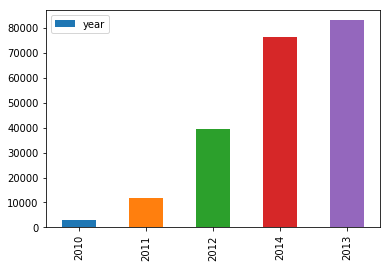

In [41]:
air.year.value_counts().sort_values().plot(kind='bar', legend=True)

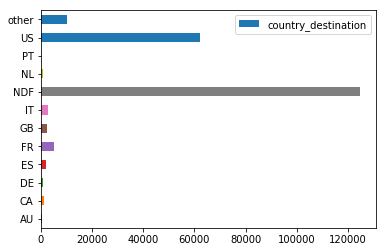

In [42]:
air.country_destination.value_counts().sort_index().plot(kind='barh', legend=True)

# the breackdown of the data stands out into obviouse fact:
# 90% of users fall into tow catgories, they either yet make a booking (NDF) or they made thier first booking in the US and also the precentaage of making booking increase each year and reached over 60% in 2014.

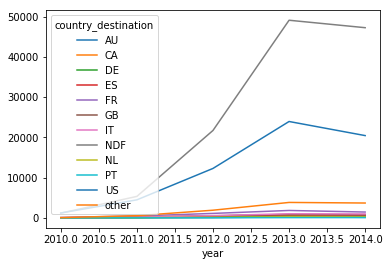

In [43]:
# the chart here confirm that most of the user majority fall into tow catigorize 
air.groupby('year').country_destination.value_counts().unstack().plot(legend=True)

In [44]:
# This chart provide an estimation of each country destination that book from by years .
air.groupby('year').country_destination.value_counts().unstack()

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
year,,,,,,,,,,,,
2010,7,42,16,43,120,28,30,1185,11,1,1228,77
2011,38,125,96,197,469,173,199,5342,68,24,4486,558
2012,103,291,290,470,1121,517,576,21713,148,33,12285,1915
2013,239,520,404,825,1852,865,1036,49076,284,76,23938,3845
2014,152,450,255,714,1461,741,994,47227,251,83,20439,3699


# what happened that the splits above will be benifital for modiling later on,  and it also  means couple of things:
# first considering that our final prediction will be made against all the new users with first activites after 2014.
# also as we saw in the country destination chart the vast majority of the data are in tow catgories and for that reason need to make ensure the training data has enugh information to ensure our model prediction.

# (In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010.) 

In [45]:
air.head()

,country_destination,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year
0,NDF,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010
1,NDF,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011
2,US,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010
3,other,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011
4,US,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010


In [46]:
air.iloc[:, [0, 16]].sort_values('year').sort_index().describe()

,year
count,213451.000000
mean,2013.023846
std,0.938489
min,2010.000000
25%,2012.000000
50%,2013.000000
75%,2014.000000
max,2014.000000


In [47]:
air[air.date_account_created > '2014']

,country_destination,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year
422,US,oamfblpxdy,2014-01-15,1970-01-01 05:35:00.417172659,2014-01-15,OTHER,45.0,basic,24,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014
710,NDF,5p0nmf3r6i,2014-05-23,1970-01-01 05:35:00.528140642,NaN,FEMALE,39.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2014
1025,NDF,dlg3a9x97v,2014-04-03,1970-01-01 05:35:00.712212924,NaN,MALE,47.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014
4180,US,p4oev43bwu,2014-02-11,1970-01-01 05:35:10.412025420,2014-02-14,-unknown-,27.0,basic,0,en,sem-brand,google,untracked,Web,iPhone,-unknown-,2014
4434,ES,r6mv11jano,2014-01-29,1970-01-01 05:35:10.424111901,2014-03-17,-unknown-,26.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,2014
4485,US,f3dnhnzzsq,2014-06-17,1970-01-01 05:35:10.426232029,2014-06-22,FEMALE,28.0,basic,0,en,direct,direct,untracked,Web,iPhone,Mobile Safari,2014
7666,NDF,to4mnzr2sq,2014-05-29,1970-01-01 05:35:10.815225448,NaN,MALE,28.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,2014
12279,NDF,836nc10vsc,2014-02-23,1970-01-01 05:35:11.108211042,NaN,-unknown-,NaN,basic,0,en,other,facebook-open-graph,omg,Web,Mac Desktop,Safari,2014
15393,US,i20tndjswt,2014-06-17,1970-01-01 05:35:20.117190402,2014-07-18,MALE,28.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2014
21538,NDF,tudiebtg0d,2014-05-31,1970-01-01 05:35:20.417080619,NaN,FEMALE,50.0,facebook,24,en,direct,direct,omg,Web,Mac Desktop,Safari,2014


In [48]:
air.groupby('year').date_account_created.describe()

,count,unique,top,freq,first,last
year,,,,,,
2010,2788,357,2010-09-14 00:00:00,19,2010-01-01 00:00:00,2010-12-31 00:00:00
2011,11775,365,2011-09-07 00:00:00,107,2011-01-01 00:00:00,2011-12-31 00:00:00
2012,39462,366,2012-08-29 00:00:00,203,2012-01-01 00:00:00,2012-12-31 00:00:00
2013,82960,365,2013-09-24 00:00:00,518,2013-01-01 00:00:00,2013-12-31 00:00:00
2014,76466,181,2014-05-13 00:00:00,674,2014-01-01 00:00:00,2014-06-30 00:00:00


date_account_created
2010-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-02    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-03    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-04    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-05    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-07    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-08    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-10    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-11    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-12    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-13    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-14    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-15    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-16    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-19    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-21    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-23    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-24    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-25    AxesSubplot(0.125,0.125;0.775x0.755)
2010-01-26

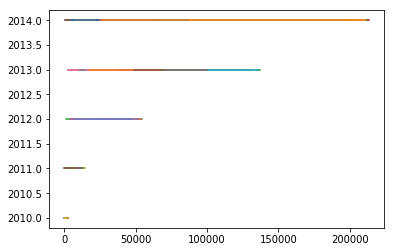

In [49]:
air.groupby('date_account_created').year.plot()

# Now looking at the chart it's provides woundefull proofs of the tremondus growth of Airbnb monthly of new accounts opened and the number of account has been created in the year of 2014. in the year to June 2014 the number of account created was 125,884- 132% increase from the year before.
# Besides showing how quicky Airnbn has grown, the data also another important facts that the vast malority of the data comes from the last tow years. this maatter because  Airbnb, if we want to use the data in sessions.csv we would be limited to data from January 2014 onwards. Again looking at the numbers, this means that even though the sessions.csv data only covers 11% of the time period (6 out of 54 months), it still covers over 30% of the training data – or 76,466 users.

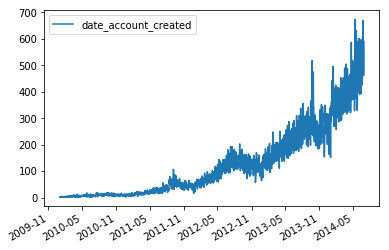

In [50]:
air.date_account_created.value_counts().plot(kind='line', legend=True)

# another wounderfull evidence of the growth increasing of Airnub averging over 10% percent growth in new account created per month.in the year of 2014 the number of new account 132% increase form the year before.
# this data also provide important insight, the majority of the training data provided come from the latest 2 year....

In [51]:
air.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [52]:
air.columns

Index(['country_destination', 'id', 'date_account_created',
       'timestamp_first_active', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'year'],
      dtype='object')

In [53]:
air.age.isnull().sum()

87990

In [54]:
sorted(air.country_destination.unique())

['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US', 'other']

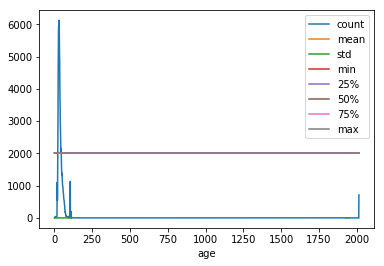

In [55]:
air.groupby('age').year.describe().plot()

In [56]:
air.age.isnull().sum()

87990

In [57]:
air.age.describe().mean

<bound method Series.mean of count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64>

In [58]:
air.isnull().sum()

country_destination             0
id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
year                            0
dtype: int64

# As we mentions before about the missing values need to be corrected we got three columns of missing information and out of the three it appears that only one is important for the analyzing.  

In [59]:
air.age.fillna('49').head()

0    49
1    38
2    56
3    42
4    41
Name: age, dtype: object

In [60]:
air["age"].fillna(air.groupby("year")["age"].transform("median"), inplace=True)

In [61]:
air.age.head()

0    36.0
1    38.0
2    56.0
3    42.0
4    41.0
Name: age, dtype: float64

In [62]:
air.age.describe()

count    213451.000000
mean         42.983340
std         119.613101
min           1.000000
25%          32.000000
50%          34.000000
75%          36.000000
max        2014.000000
Name: age, dtype: float64

# there are a lot of opthions of considration when dealing with missing values whether its nominal / catigorical or numrical / ordinal values and the key to sucess it deapends on the data itself. in this airbnb data choosing the mean to fill in with the missing values.

In [63]:
air.age.describe()

count    213451.000000
mean         42.983340
std         119.613101
min           1.000000
25%          32.000000
50%          34.000000
75%          36.000000
max        2014.000000
Name: age, dtype: float64

In [64]:
 train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

NameError: name 'train' is not defined

In [ ]:
air.columns

In [ ]:
air.groupby('first_device_type').year.value_counts(normalize=True, ascending=True).unstack()

# looking into the decvice types shows how diffrient devices has been used across and which one has took off the battle. mac Desktop wining across the year follwed by windows user and there is signficantly increasiing.
# as with the other columns we have reviewed above, this change over time reinforces the presumption that recent data is likely to be the most useful for building our model.

In [ ]:
air.groupby('country_destination').year.sum()

In [ ]:
air.signup_method.unique()

In [ ]:
air.groupby('year').country_destination.value_counts().unstack()

In [ ]:
air.head()

# ok we already discovered an intersing meangfull insight through out the data thus, when peaple talking about cleaning data there are a few specfice things:
1- fixing datetime foramte.
2- filling in missing vlaues
3- correcting misinterpreted values
